In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
sns.set(style="whitegrid")

In [3]:
file_path=r"/content/2023_nba_player_stats(4).csv"
data=pd.read_csv(file_path)

In [15]:
np.random.seed(42)
time_stamps=10
players=[]
for _,row in data.iterrows():
    for t in range(time_stamps):
        players.append({'PName': row['PName'],'HR': row['HR'] + np.random.uniform(-10, 10),'Accel_X': row['Accel_X'] + np.random.uniform(-0.5, 0.5),'Accel_Y': row['Accel_Y'] + np.random.uniform(-0.5, 0.5),
'Accel_Z': row['Accel_Z'] + np.random.uniform(-0.5, 0.5),'Gyro_X': row['Gyro_X'] + np.random.uniform(-0.5, 0.5),'Gyro_Y': row['Gyro_Y'] + np.random.uniform(-0.5, 0.5),'Gyro_Z': row['Gyro_Z'] + np.random.uniform(-0.5, 0.5),
'Time': t + 1,'Custom_Feature': t * np.random.uniform(0.5, 1.5),})
expanded_data = pd.DataFrame(players)


In [16]:
sensor_features=['Accel_X','Accel_Y','Accel_Z','Gyro_X','Gyro_Y','Gyro_Z']
X=expanded_data[sensor_features]

In [17]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
print("Standardized feature data:")
print(pd.DataFrame(X_scaled,columns=sensor_features).describe())

Standardized feature data:
            Accel_X       Accel_Y       Accel_Z        Gyro_X        Gyro_Y  \
count  5.400000e+03  5.400000e+03  5.400000e+03  5.400000e+03  5.400000e+03   
mean  -7.894919e-17  3.355341e-17 -3.815878e-17 -1.263187e-16 -2.631640e-18   
std    1.000093e+00  1.000093e+00  1.000093e+00  1.000093e+00  1.000093e+00   
min   -2.923825e+00 -2.952032e+00 -2.459787e+00 -4.102815e+00 -7.274899e+00   
25%   -6.288782e-01 -7.251473e-01 -7.202371e-01 -7.022695e-01 -4.140380e-01   
50%    6.940235e-02  5.254614e-02  5.053825e-02  1.864515e-01 -1.104911e-01   
75%    6.814086e-01  7.377271e-01  7.462115e-01  7.483595e-01  5.971186e-01   
max    2.789655e+00  2.677823e+00  3.320947e+00  2.342742e+00  6.365047e+00   

             Gyro_Z  
count  5.400000e+03  
mean  -1.052656e-17  
std    1.000093e+00  
min   -6.012115e+00  
25%   -6.307139e-01  
50%   -3.907938e-02  
75%    7.675135e-01  
max    4.898656e+00  


In [19]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=42)
expanded_data['Activity_Mode']=kmeans.fit_predict(X_scaled)

In [20]:
print("The number distribution of each cluster:")
print(expanded_data['Activity_Mode'].value_counts())

The number distribution of each cluster:
Activity_Mode
2    2124
1    2098
0    1178
Name: count, dtype: int64


In [77]:
selected_players=['Jalen Brunson','Joel Embiid','Damian Lillard']
filtered_data=expanded_data[expanded_data['PName'].isin(selected_players)]

In [78]:
omplete_data = pd.DataFrame({'Time': np.tile(np.arange(1, time_stamps + 1), len(selected_players)),'PName': np.repeat(selected_players, time_stamps)})

In [79]:
if not filtered_data.empty:complete_data = pd.DataFrame({'Time': np.tile(np.arange(1, time_stamps + 1), len(selected_players)),'PName': np.repeat(selected_players, time_stamps)})
merged_data = complete_data.merge(filtered_data, on=['PName', 'Time'], how='left')

In [80]:
merged_data['Activity_Mode']=merged_data['Activity_Mode'].interpolate(method='linear')

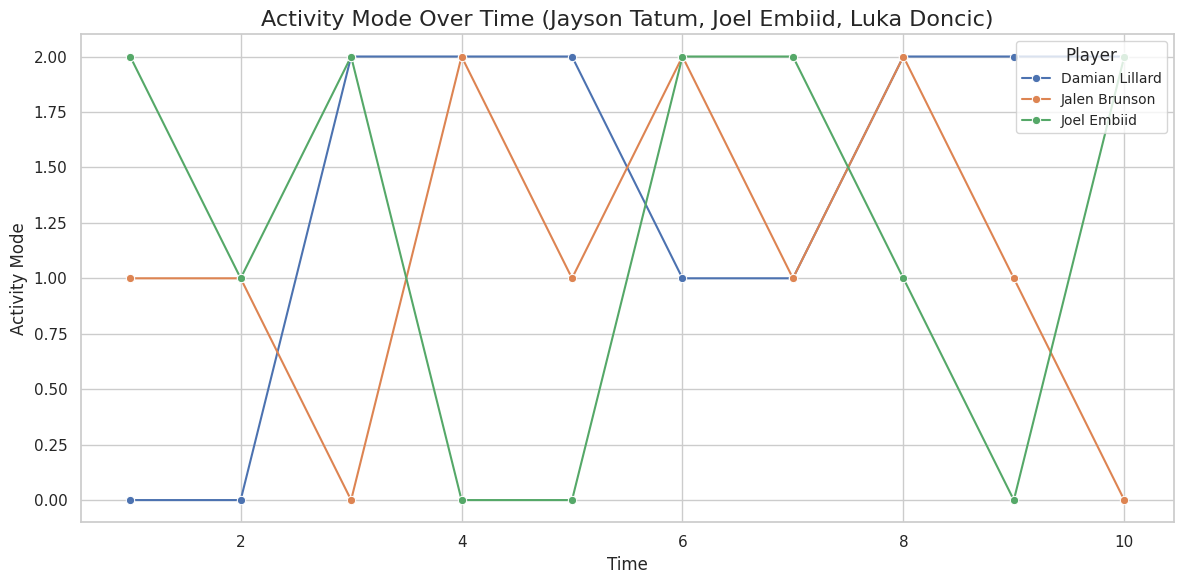

In [81]:
plt.figure(figsize=(12,6))
for name, group in merged_data.groupby('PName'):sns.lineplot(data=group, x='Time', y='Activity_Mode', label=name, marker='o')
plt.title("Activity Mode Over Time (Jayson Tatum, Joel Embiid, Luka Doncic)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Activity Mode", fontsize=12)
plt.legend(title="Player", loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

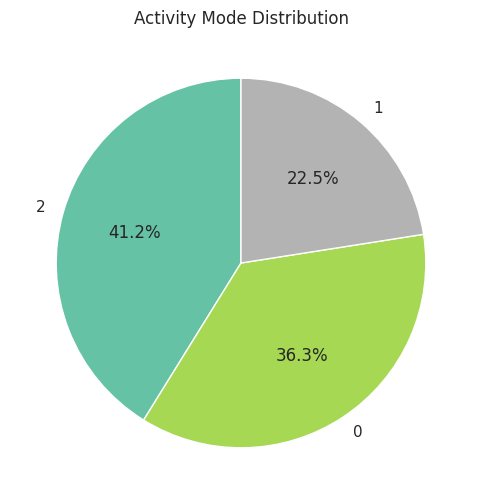

In [ ]:
activity_counts=expanded_data['Activity_Mode'].value_counts()
plt.figure(figsize=(8,6))
activity_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,cmap='Set2')
plt.title("Activity Mode Distribution")
plt.ylabel("")
plt.show()

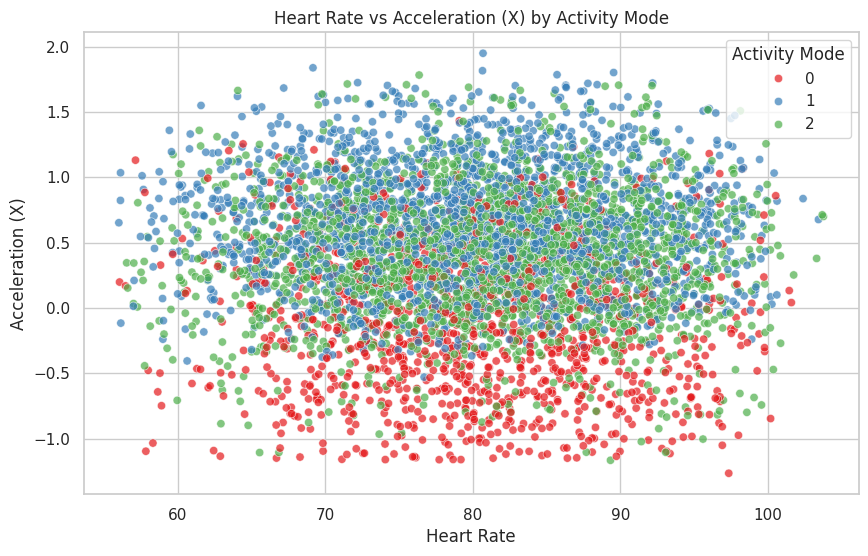

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=expanded_data,x='HR',y='Accel_X',hue='Activity_Mode',palette='Set1',alpha=0.7)
plt.title("Heart Rate vs Acceleration (X) by Activity Mode")
plt.xlabel("Heart Rate")
plt.ylabel("Acceleration (X)")
plt.legend(title="Activity Mode")
plt.show()

In [ ]:
activity_summary=expanded_data.groupby('Activity_Mode')[['HR']].mean()
print("\nActivity Mode Summary (Average Heart Rate):\n",activity_summary)


Activity Mode Summary (Average Heart Rate):
                       HR
Activity_Mode           
0              80.163096
1              80.004460
2              80.745788


In [ ]:
activity_plus_minus=expanded_data.groupby(['PName','Activity_Mode'])[['HR']].mean().unstack()
print("\nPlus-Minus by Activity Mode for Each Player:\n",activity_plus_minus)


Plus-Minus by Activity Mode for Each Player:
                         HR                      
Activity_Mode            0          1          2
PName                                           
A.J. Lawson            NaN  82.329700        NaN
AJ Green               NaN  71.942895        NaN
AJ Griffin             NaN        NaN  78.711370
Aaron Gordon     88.367213  82.967358        NaN
Aaron Holiday    83.680227        NaN        NaN
...                    ...        ...        ...
Zach Collins           NaN  86.449042        NaN
Zach LaVine            NaN  82.605656        NaN
Zeke Nnaji             NaN  69.095103  71.017499
Ziaire Williams        NaN  74.784873        NaN
Zion Williamson        NaN  76.242037  81.682491

[540 rows x 3 columns]


<ipython-input-81-d2c7ce5c5fcd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=expanded_data,x='Activity_Mode',y='HR',palette='Set3')


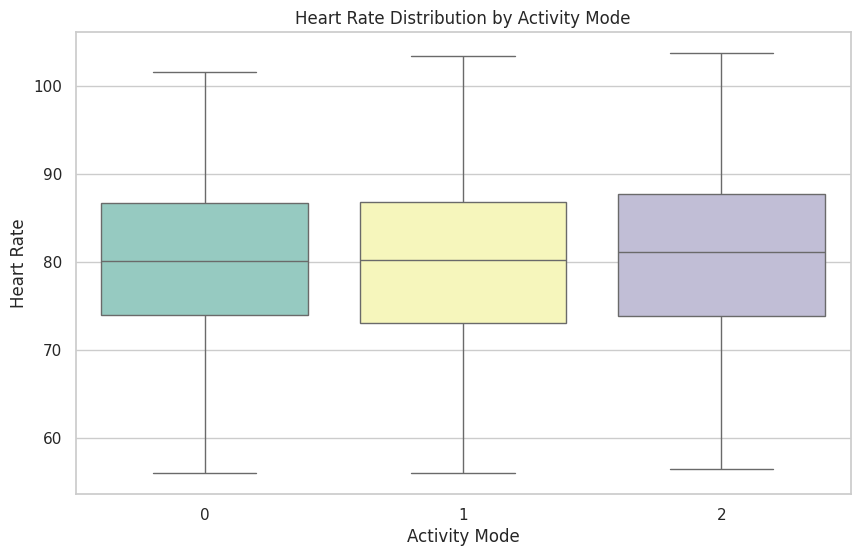

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=expanded_data,x='Activity_Mode',y='HR',palette='Set3')
plt.title("Heart Rate Distribution by Activity Mode")
plt.xlabel("Activity Mode")
plt.ylabel("Heart Rate")
plt.show()

In [ ]:
output_file = "New_NBA_player_activity_analysis_data.csv"
expanded_data.to_csv(output_file, index=False)
print(f"Data has been saved to {output_file}")

Data has been saved to New_NBA_player_activity_analysis_data.csv
